# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Jihan Aulia
- **Email:** jihanaulia2408@gmail.com
- **ID Dicoding:** MS066D5X0479


## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Kapan waktu paling banyak penyewaan sepeda berdasarkan musim?
- Pertanyaan 2 : Bagaimana hubungan suhu dengan penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
from datetime import datetime

## Data Wrangling

### Gathering Data

Mengambil data pada github ku sendiri. pertama aku mengupload data set pada repository github ku, kemudian aku ambil link raw nya dan menaruhnya disini.

In [5]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Najiann/dataset/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/Najiann/dataset/refs/heads/main/hour.csv")

**Insight:**
- Dataset berasal dari sistem Capital Bikeshare di Washington D.C. (2011–2012).
- Ada dua file utama: day.csv (data harian) dan hour.csv (data per jam).


### Assessing Data

Disini aku melakukan penilaian terhadap data data ini, mulai dari melihat apakah ada data yang duplikat, atau apakah ada data yang aneh atau tidak biasa. disinilah aku menilai data data itu, dan mencatat setiap keanehan yang ada di data ini.

In [6]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()


hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dataset ini memiliki distribusi data yang merata, untuk data pejam memiliki 17.397 entri dan 731 data harinya.
- sebagian besar data menunjukkan bahwa cuaca biasanya cerah, untuk cuaca buruk hanya tercatat 3 kali kejadian

### Cleaning Data

Disini aku melakukan pembersihan pada data, karena sebelumnya aku sudah melakukan penilaian terhadap dataset itu, aku menemukan beberapa masalah. dan di sini lah aku melakukan pembersihan data, agar data yang di hasilkan menjadi bagus.

In [7]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

# Merge kedua data berdasarkan kolom 'dteday'
merged_df = pd.merge(day_df, hour_df, on="dteday", how="inner")

# Cek hasil penggabungan
print(merged_df.info())
print(merged_df.head())

# Jika ingin menyimpan hasilnya
merged_df.to_csv("merged_dataset.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- kolom dteday sudah terganti/terformat "datetime64[ns]" pada kedua dataset
- data konsisten tidak ada nilai not null

## Exploratory Data Analysis (EDA)

### Explore ...

Pada tahap ini aku melakukan exploratory pada dataset. aku melakukan explor untuk menemukan jawaban tentang pertanyaan pertanyaan ku di awal. dan disinilah aku menemukan jawabannya.

In [8]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penyewaan sepeda

season = day_df.groupby(by="season").agg({
    "cnt":"sum" #total penyewaan sepeda permusimnya
}).sort_values(by="cnt", ascending=False)

print("Jumlah Penyewaan Sepeda Berdasarkan Musim: ")
print(season)

correlation = day_df[['temp', 'cnt']].corr()
print("Korelasi antara suhu dan penyewaan sepeda: ")
print(correlation)

Jumlah Penyewaan Sepeda Berdasarkan Musim: 
            cnt
season         
3       1061129
2        918589
4        841613
1        471348
Korelasi antara suhu dan penyewaan sepeda: 
          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000


**Insight:**
- musim dengan jumlah penyewaan sepeda tertinggi adalah musim 3 yaitu musim panas dengan total penyewaan sekitar 1,061,129. lalu juga musim semi sebanyakn 981.589 penyewaannya. lalu musim dengan penyewaan terendah adalah musim dingin hanya sekitar 471,384 penyewaannya
- korelasi antara suhu dan jumlah penyewaan sepeda sebesar 0.627. artinya semakin tinggi suhunya semakin banyak yang menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

pertama, aku mendefinisikan season_name sebagai dictionary yang digunakan untuk mempermudah memahami musim. disini angka 1-4 mewakili musim, seperti 1 itu untuk musim dingin, 2 untuk musim semi, 3 untuk musin panas, dan 4 untuk musim gugur. lalu aku membuat untuk grafik visualisasinya.

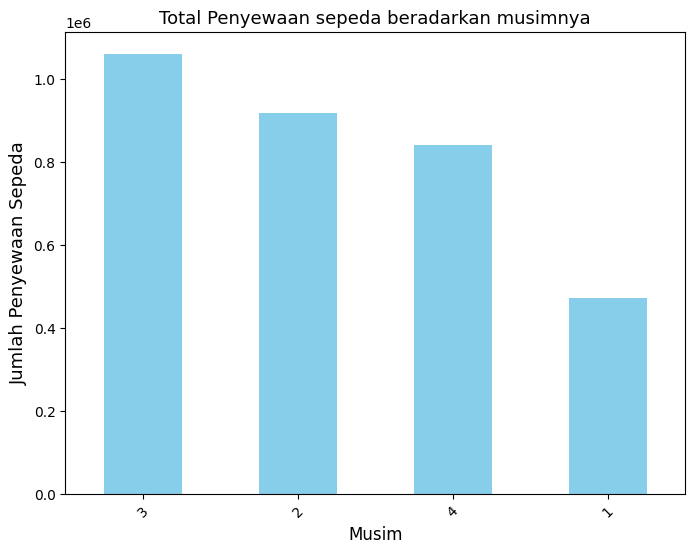

In [13]:
season_name = {
    1:'Musim Dingin',
    2:'Musim Semi',
    3:'Musim Panas',
    4:'Musim Gugur'
}

plt.figure(figsize=(8,6))
season['cnt'].plot(kind='bar', color='skyblue')
plt.title('Total Penyewaan sepeda beradarkan musimnya', fontsize=13)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=13)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

Nah, Untuk koda ini, kode ini digunakan untuk membuat grafik regresi antara suhu dan jumlah penyewaan sepeda. lalu dengan sns.regplot() kita bisa menampilkan titik titik data dan menambahkan garis regresi yang berwarna merah itu.

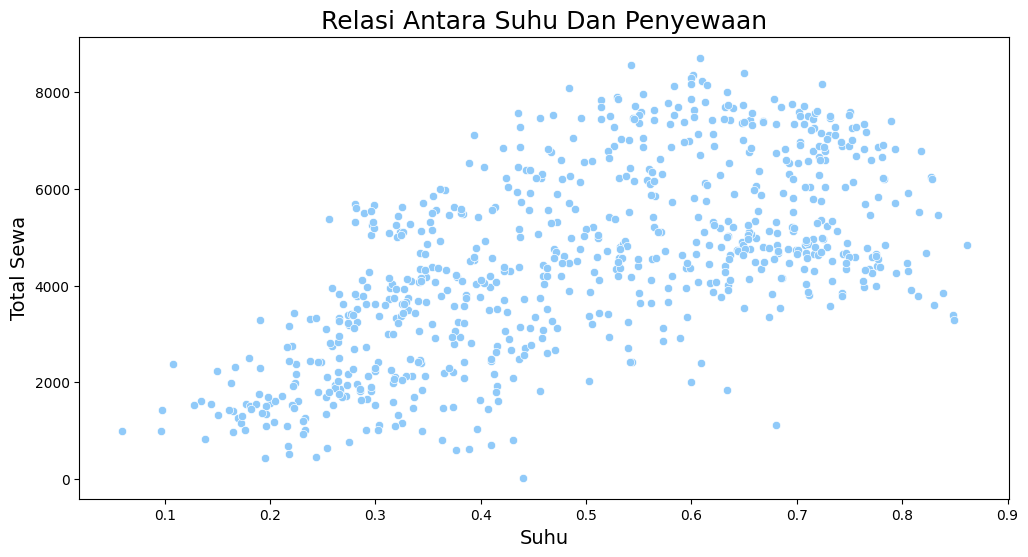

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], color="#90CAF9", ax=ax)
ax.set_title("Relasi Antara Suhu Dan Penyewaan", fontsize=18)
ax.set_xlabel("Suhu", fontsize=14)
ax.set_ylabel("Total Sewa", fontsize=14)

plt.show()

**Insight:**
- dari visualisasi menunjukkan bahwa musim panas memiliki jumlah penyewaan sepeda tertinggi dari pada musim lainnya. Hal ini mungkin di karenakan cuaca yang nyaman untuk aktivitas di luar ruangan seperti bersepeda.

- divisualisasi menunjukkan bahwa korelasi positif yang jelas antara suhu dan menyewaan sepeda. semakin tinggi suhu, semakin banyak sepeda yang di sewa.

## Analisis Lanjutan (Opsional)

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

last_date = day_df['dteday'].max()

# recency
day_df['recency'] = (last_date - day_df['dteday']).dt.days

# frequency
day_df['month'] = day_df['dteday'].dt.to_period('M')
frequency = day_df.groupby('month')['cnt'].sum()

# monetary
monetary = day_df.groupby('month')['cnt'].sum()

# satukan
rfm = pd.DataFrame({
    'recency': day_df.groupby('month')['recency'].min(),
    'frequency': frequency,
    'monetary': monetary
}).reset_index()

print(rfm)

      month  recency  frequency  monetary
0   2011-01      700      38189     38189
1   2011-02      672      48215     48215
2   2011-03      641      64045     64045
3   2011-04      611      94870     94870
4   2011-05      580     135821    135821
5   2011-06      550     143512    143512
6   2011-07      519     141341    141341
7   2011-08      488     136691    136691
8   2011-09      458     127418    127418
9   2011-10      427     123511    123511
10  2011-11      397     102167    102167
11  2011-12      366      87323     87323
12  2012-01      335      96744     96744
13  2012-02      306     103137    103137
14  2012-03      275     164875    164875
15  2012-04      245     174224    174224
16  2012-05      214     195865    195865
17  2012-06      184     202830    202830
18  2012-07      153     203607    203607
19  2012-08      122     214503    214503
20  2012-09       92     218573    218573
21  2012-10       61     198841    198841
22  2012-11       31     152664   

## Conclusion

- Kesimpulan dari hasil analisis terhadap pertanyaan 1, yaitu musim yang memiliki jumlah penyewaan sepeda tertinggi adalah musim panas, sementara di urutan kedua ada musim gugur. mungkin ini di sebabkan karena cuacanya yang nyaman dan hangat untuk melakukan aktivitas di luar ruangan seperti bersepeda.

- Kesimpulan dari hasil analisis terhadap pertanyaan 2, yaitu regresi antara suhu dan penyewaan sepeda menunjukkan hasil yang positif jelas. semakin tinggi suhu, semakin banyak sepeda yang disewa. itu di karenakan cuaca yang nyaman untuk melakukan aktifitas luar ruangan.